# Hierarchical Agglomerative Clustering (HAC)


## Problem Statement


Apply **Hierarchical Agglomerative Clustering (HAC)** on the **Iris dataset** using the **complete linkage** method and a **bottom-up (agglomerative)** approach, considering only **sepal length** and **petal width** as features, and divide the data into **three clusters**.


### Import Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

### Load the Iris Dataset


In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Features: ", feature_names)
print("Target: ", target_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target:  ['setosa' 'versicolor' 'virginica']


In [3]:
df = pd.DataFrame(X, columns=feature_names)
species_map = {i: name for i, name in enumerate(iris.target_names)}
df["species"] = [species_map[label] for label in y]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Plotting


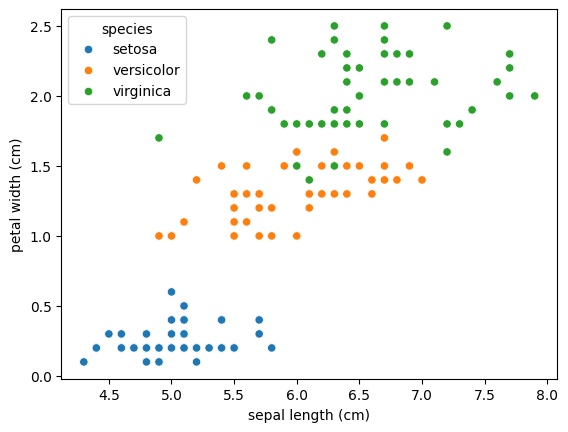

In [4]:
sns.scatterplot(x="sepal length (cm)", y="petal width (cm)", data=df, hue="species")
plt.show()

### Standardizing the data


In [5]:
scaler = StandardScaler()
X = iris.data[:, [0, 3]]
X_scaled = scaler.fit_transform(X)

### Implement Hierarchical Agglomerative Clustering with complete linkage


In [6]:
agg_clust = AgglomerativeClustering(n_clusters=3, metric="cosine", linkage="complete")
agg_clust.fit_predict(X_scaled)

array([2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1,
       0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
Z = linkage(X_scaled, method="complete", metric="cosine")

### Visualize Clusters


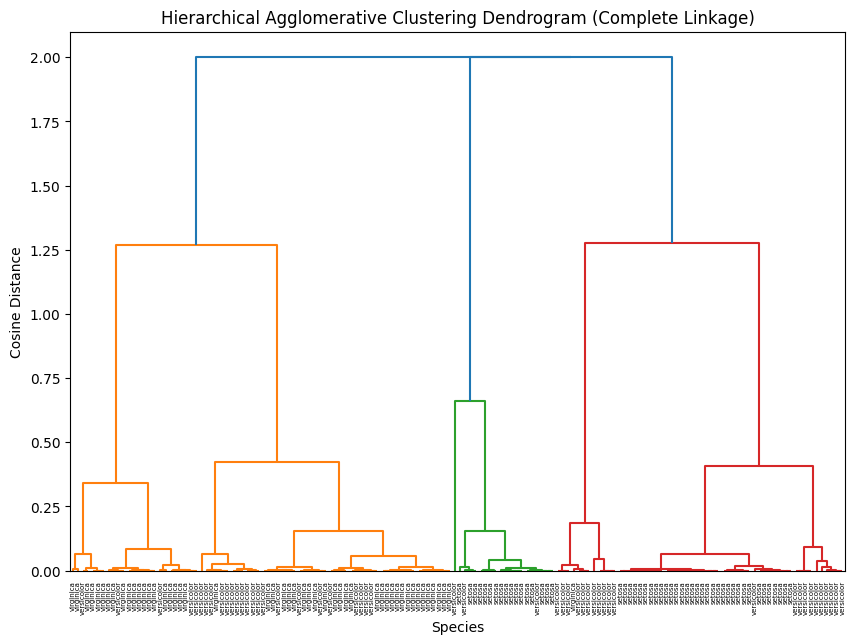

In [8]:
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=iris.target_names[y], leaf_rotation=90)
plt.title("Hierarchical Agglomerative Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Species")
plt.ylabel("Cosine Distance")
plt.show()